# **Strategies**(***Paytm***)

In [28]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/PAYTM_historical_data.csv")
data

,Date,Open,High,Low,Close,Volume
0,2022-08-01T09:15:00+05:30,708.00,713.90,707.45,712.75,47041
1,2022-08-01T09:16:00+05:30,713.40,714.00,710.30,711.90,19707
2,2022-08-01T09:17:00+05:30,711.05,712.10,711.00,711.30,14889
3,2022-08-01T09:18:00+05:30,712.00,712.65,711.20,711.95,11883
4,2022-08-01T09:19:00+05:30,712.35,713.55,712.15,712.55,14532
...,...,...,...,...,...,...
184495,2023-07-31T15:25:00+05:30,644.80,644.80,644.15,644.15,19116
184496,2023-07-31T15:26:00+05:30,644.35,644.70,644.15,644.70,22111
184497,2023-07-31T15:27:00+05:30,644.70,644.70,644.35,644.40,24553
184498,2023-07-31T15:28:00+05:30,644.40,644.65,642.90,644.00,67930


# ***1***-***Basic*** ***Breakout*** ***Trading*** ***Strategy***

In [29]:
# The breakout trading strategy is a widely used approach in technical analysis,
# and it holds significance for traders looking to capitalize on strong price
# movements following periods of consolidation

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

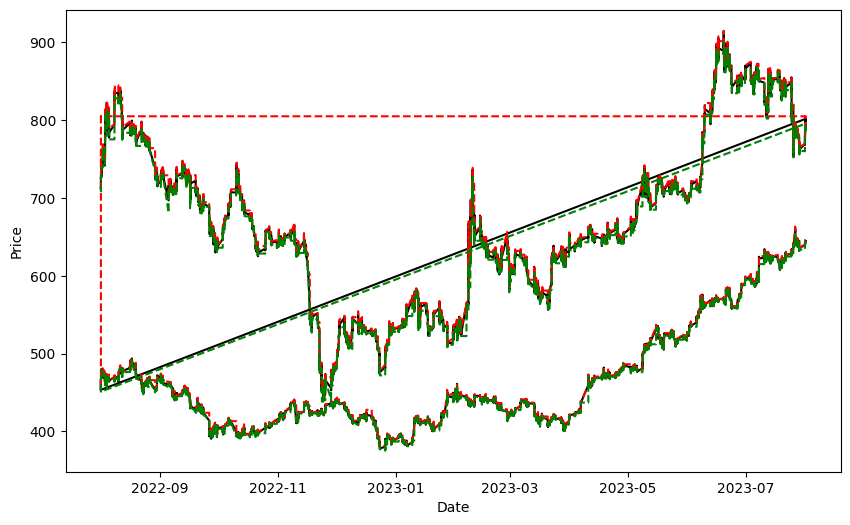

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'])

# Define breakout parameters
breakout_window = 20  # Number of periods to consider for breakout
breakout_percentage = 0.02  # Minimum percentage change for breakout

# Calculate support and resistance levels
data['Support'] = data['Low'].rolling(window=breakout_window).min()
data['Resistance'] = data['High'].rolling(window=breakout_window).max()

# Identify breakouts
data['BullishBreakout'] = data['Close'] > data['Resistance'] * (1 + breakout_percentage)
data['BearishBreakout'] = data['Close'] < data['Support'] * (1 - breakout_percentage)

# Plotting the data with breakout levels
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='black')
plt.plot(data['Date'], data['Resistance'], label='Resistance', color='red', linestyle='--')
plt.plot(data['Date'], data['Support'], label='Support', color='green', linestyle='--')

# Plot breakout signals
plt.plot(data[data['BullishBreakout']]['Date'], data[data['BullishBreakout']]['Close'], '^', markersize=8, color='green', label='Bullish Breakout')
plt.plot(data[data['BearishBreakout']]['Date'], data[data['BearishBreakout']]['Close'], 'v', markersize=8, color='red', label='Bearish Breakout')

plt.xlabel('Date')
plt.ylabel('Price')
plt


# ***2***-***Elliott*** ***Wave*** ***Theory***

In [31]:
# Elliott Wave Theory is a technical analysis approach that involves identifying
# patterns of waves within price movements to forecast potential future price
# directions.

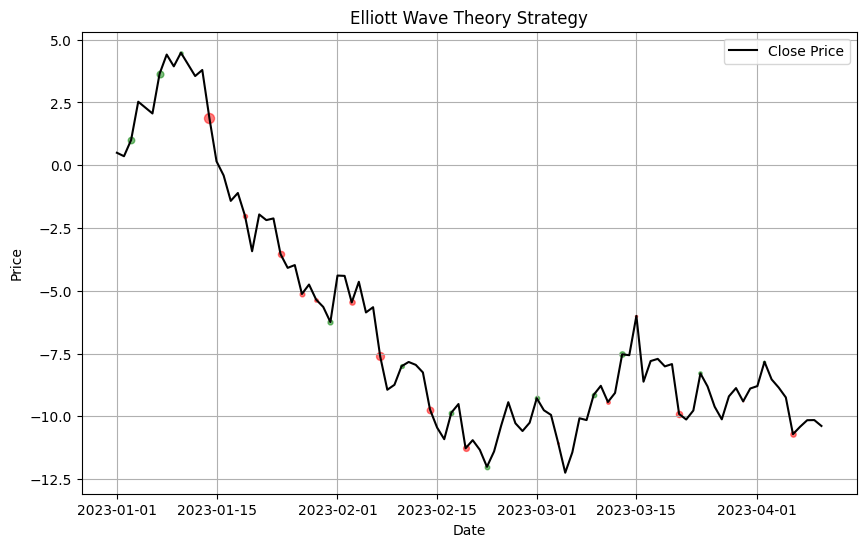

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
np.random.seed(42)
n_periods = 100
data = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=n_periods, freq='D'),
    'Close': np.cumsum(np.random.randn(n_periods))
})

# Define parameters for Elliott Wave Theory
wave_threshold = 0.5  # Minimum price change for wave detection

# Calculate price changes
data['PriceChange'] = data['Close'].diff()

# Identify Elliott Waves
def identify_elliott_waves(data, threshold):
    waves = []
    current_wave = 0
    wave_start_index = None

    for i in range(len(data)):
        if abs(data['PriceChange'][i]) > threshold:
            if wave_start_index is None:
                wave_start_index = i
            current_wave += data['PriceChange'][i]
        elif wave_start_index is not None:
            waves.append(('Up' if current_wave > 0 else 'Down', abs(current_wave), data['Date'][wave_start_index]))
            current_wave = 0
            wave_start_index = None

    return waves

elliott_waves = identify_elliott_waves(data, wave_threshold)

# Plotting the data with Elliott Waves
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='black')

for wave in elliott_waves:
    wave_type, magnitude, date = wave
    plt.scatter(date, data[data['Date'] == date]['Close'], color='green' if wave_type == 'Up' else 'red', marker='o', s=magnitude * 10, alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Elliott Wave Theory Strategy')
plt.legend()
plt.grid()
plt.show()


# ***3***-***Trend*** ***Following*** ***Strategy***

In [33]:
# This strategy aims to capitalize on strong and sustained price trends by
# entering trades in the direction of the prevailing trend.

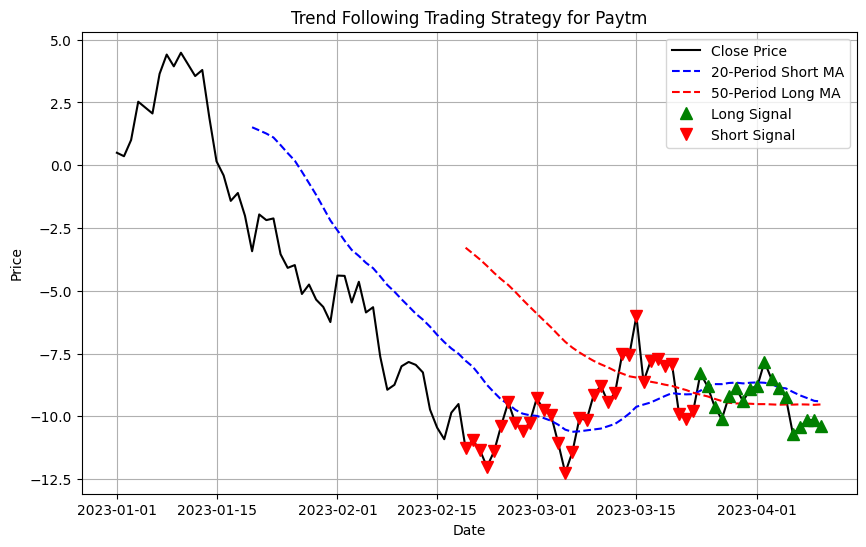

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'])

# Define parameters for the trend following strategy
short_window = 20  # Short-term moving average window
long_window = 50   # Long-term moving average window

# Calculate short-term and long-term moving averages
data['ShortMA'] = data['Close'].rolling(window=short_window).mean()
data['LongMA'] = data['Close'].rolling(window=long_window).mean()

# Identify trend following opportunities
data['LongSignal'] = data['ShortMA'] > data['LongMA']
data['ShortSignal'] = data['ShortMA'] < data['LongMA']

# Plotting the data with trend following signals
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='black')
plt.plot(data['Date'], data['ShortMA'], label=f'{short_window}-Period Short MA', color='blue', linestyle='--')
plt.plot(data['Date'], data['LongMA'], label=f'{long_window}-Period Long MA', color='red', linestyle='--')

# Plot trend following signals
plt.plot(data[data['LongSignal']]['Date'], data[data['LongSignal']]['Close'], '^', markersize=8, color='green', label='Long Signal')
plt.plot(data[data['ShortSignal']]['Date'], data[data['ShortSignal']]['Close'], 'v', markersize=8, color='red', label='Short Signal')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Trend Following Trading Strategy for Paytm')
plt.legend()
plt.grid()
plt.show()


# *4*-***Momentum*** ***Trading*** ***Strategy***

In [35]:
# The Momentum Trading Strategy is used by traders and investors to capitalize on
# the continuation of existing trends in the market. It's based on the principle
# that securities that have been performing well (have positive momentum) are
# likely to continue performing well in the short term, and securities that have
# been performing poorly (have negative momentum) are likely to continue
# performing poorly.

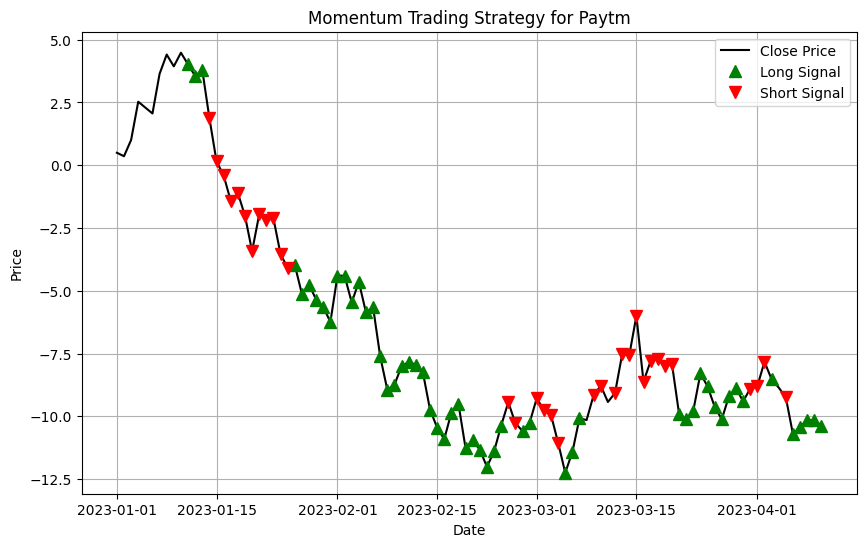

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'])

# Define parameters for the momentum trading strategy
lookback_period = 10  # Number of periods to calculate the momentum
momentum_threshold = 0.02  # Minimum momentum value for identifying opportunities

# Calculate momentum
data['Momentum'] = data['Close'].pct_change(periods=lookback_period)

# Identify momentum trading opportunities
data['LongSignal'] = data['Momentum'] > momentum_threshold
data['ShortSignal'] = data['Momentum'] < -momentum_threshold

# Plotting the data with momentum-based signals
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='black')

# Plot momentum-based signals
plt.plot(data[data['LongSignal']]['Date'], data[data['LongSignal']]['Close'], '^', markersize=8, color='green', label='Long Signal')
plt.plot(data[data['ShortSignal']]['Date'], data[data['ShortSignal']]['Close'], 'v', markersize=8, color='red', label='Short Signal')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Momentum Trading Strategy for Paytm')
plt.legend()
plt.grid()
plt.show()


# ***5***-***Pivot*** ***Point*** ***Trading*** ***Strategy***

In [37]:
# Pivot points are levels calculated from previous high, low, and close prices and
# are used to identify potential support and resistance levels.

In [38]:
data = pd.read_csv("/content/drive/MyDrive/PAYTM_historical_data.csv")

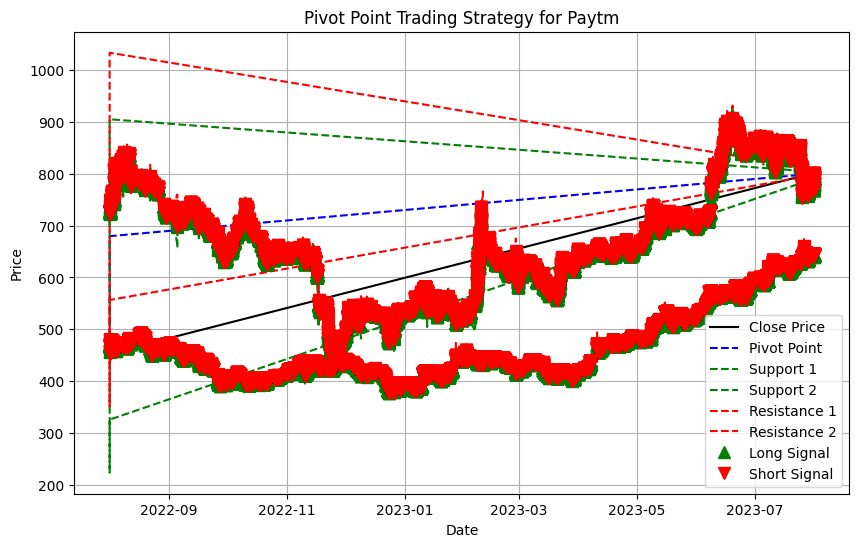

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'])

# Define parameters for the pivot point trading strategy
pivot_window = 20  # Number of periods to consider for pivot point calculation

# Calculate pivot points
data['Pivot'] = (data['High'].rolling(window=pivot_window).max() + data['Low'].rolling(window=pivot_window).min() + data['Close'].rolling(window=pivot_window).mean()) / 3

# Calculate support and resistance levels
data['Support1'] = (2 * data['Pivot']) - data['High'].rolling(window=pivot_window).min()
data['Support2'] = data['Pivot'] - (data['High'].rolling(window=pivot_window).max() - data['Low'].rolling(window=pivot_window).min())
data['Resistance1'] = (2 * data['Pivot']) - data['Low'].rolling(window=pivot_window).max()
data['Resistance2'] = data['Pivot'] + (data['High'].rolling(window=pivot_window).max() - data['Low'].rolling(window=pivot_window).min())

# Identify pivot point trading opportunities
data['LongSignal'] = data['Close'] > data['Resistance1']
data['ShortSignal'] = data['Close'] < data['Support1']

# Plotting the data with pivot point signals
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='black')
plt.plot(data['Date'], data['Pivot'], label='Pivot Point', color='blue', linestyle='--')
plt.plot(data['Date'], data['Support1'], label='Support 1', color='green', linestyle='--')
plt.plot(data['Date'], data['Support2'], label='Support 2', color='green', linestyle='--')
plt.plot(data['Date'], data['Resistance1'], label='Resistance 1', color='red', linestyle='--')
plt.plot(data['Date'], data['Resistance2'], label='Resistance 2', color='red', linestyle='--')

# Plot pivot point signals
plt.plot(data[data['LongSignal']]['Date'], data[data['LongSignal']]['Close'], '^', markersize=8, color='green', label='Long Signal')
plt.plot(data[data['ShortSignal']]['Date'], data[data['ShortSignal']]['Close'], 'v', markersize=8, color='red', label='Short Signal')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Pivot Point Trading Strategy for Paytm')
plt.legend()
plt.grid()
plt.show()


# ***6***-***Range*** ***Breakout*** ***Strategy***

In [40]:
# This strategy aims to capture potential price movements when the price breaks
# out of a defined range.

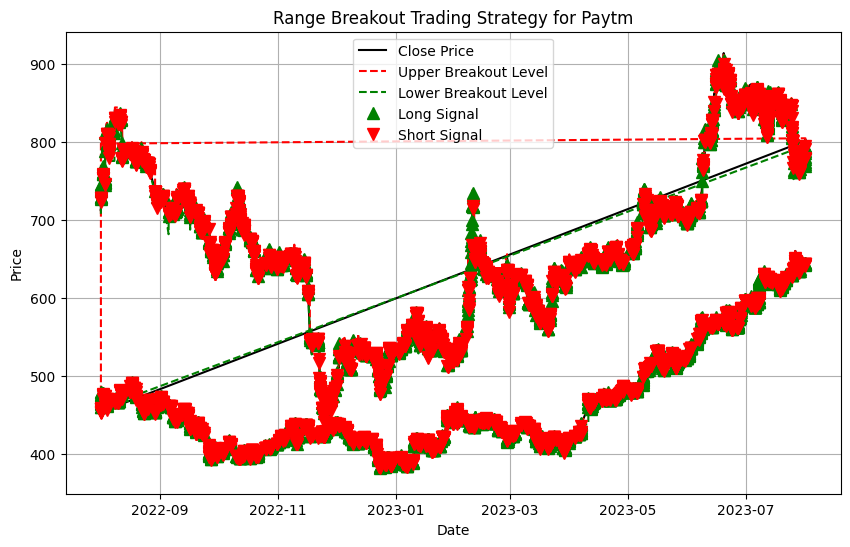

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'])

# Define parameters for the range breakout strategy
range_window = 20  # Number of periods to consider for range calculation
breakout_percentage = 0.02  # Minimum percentage change for breakout

# Calculate the range (high-low) over the defined period
data['Range'] = data['High'].rolling(window=range_window).max() - data['Low'].rolling(window=range_window).min()

# Identify range breakout trading opportunities
data['LongSignal'] = data['Close'] > (data['High'].rolling(window=range_window).max() - data['Range'] * breakout_percentage)
data['ShortSignal'] = data['Close'] < (data['Low'].rolling(window=range_window).min() + data['Range'] * breakout_percentage)

# Plotting the data with range breakout signals
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='black')

# Plot range breakout levels
plt.plot(data['Date'], data['High'].rolling(window=range_window).max() - data['Range'] * breakout_percentage, label='Upper Breakout Level', color='red', linestyle='--')
plt.plot(data['Date'], data['Low'].rolling(window=range_window).min() + data['Range'] * breakout_percentage, label='Lower Breakout Level', color='green', linestyle='--')

# Plot range breakout signals
plt.plot(data[data['LongSignal']]['Date'], data[data['LongSignal']]['Close'], '^', markersize=8, color='green', label='Long Signal')
plt.plot(data[data['ShortSignal']]['Date'], data[data['ShortSignal']]['Close'], 'v', markersize=8, color='red', label='Short Signal')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Range Breakout Trading Strategy for Paytm')
plt.legend()
plt.grid()
plt.show()


# ***7***-***Options*** ***Straddle*** ***Strategy***

In [42]:
# The options straddle strategy involves purchasing both a call option and a put
# option with the same strike price and expiration date. This strategy profits
# from significant price movements regardless of whether the price moves up or
# down.

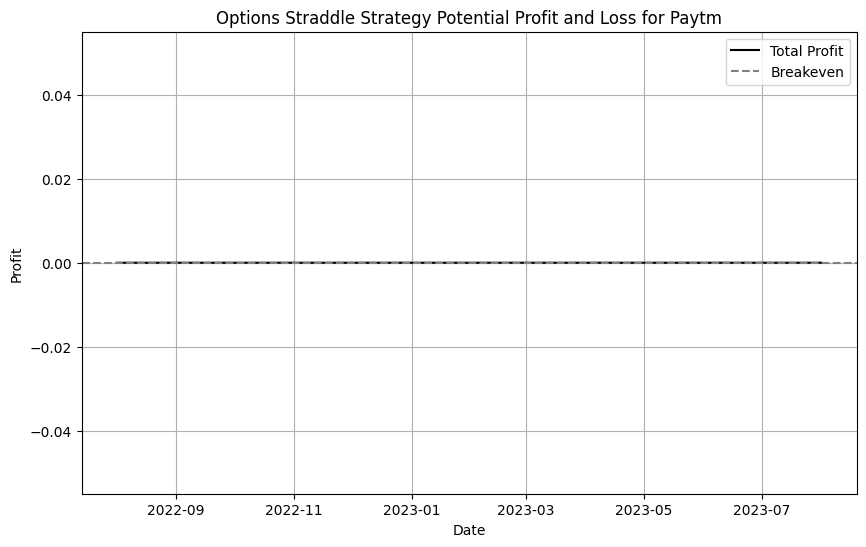

In [43]:
import pandas as pd
import matplotlib.pyplot as plt


data['Date'] = pd.to_datetime(data['Date'])

# Define parameters for the options straddle strategy
strike_price = data['Close'].iloc[-1]  # Use the most recent closing price as the strike price

# Calculate potential profit and loss based on the strategy
data['CallProfit'] = data['Close'] - strike_price
data['PutProfit'] = strike_price - data['Close']
data['TotalProfit'] = data['CallProfit'] + data['PutProfit']

# Plotting the potential profit and loss of the options straddle strategy
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['TotalProfit'], label='Total Profit', color='black')
plt.axhline(y=0, color='gray', linestyle='--', label='Breakeven')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Options Straddle Strategy Potential Profit and Loss for Paytm')
plt.legend()
plt.grid()
plt.show()


# ***8***-***Gap*** **Trading** ***Strategy***

In [44]:
# Gap trading involves identifying and trading price gaps that occur between the
# closing price of the previous trading session and the opening price of the
# current session.

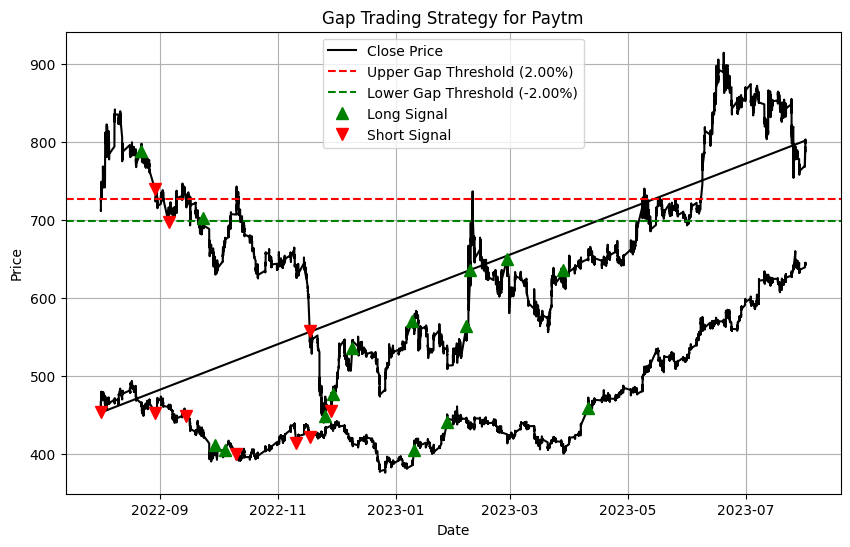

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'])

# Calculate the price gap between previous day's close and current day's open
data['PriceGap'] = data['Open'] - data['Close'].shift(1)

# Define parameters for the gap trading strategy
gap_threshold = 0.02  # Minimum percentage change for a significant gap

# Identify gap trading opportunities
data['LongSignal'] = data['PriceGap'] > data['Close'] * gap_threshold
data['ShortSignal'] = data['PriceGap'] < -data['Close'] * gap_threshold

# Plotting the data with gap trading signals
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='black')

# Plot gap levels
plt.axhline(y=data['Close'].iloc[0] * (1 + gap_threshold), color='red', linestyle='--', label=f'Upper Gap Threshold ({gap_threshold * 100:.2f}%)')
plt.axhline(y=data['Close'].iloc[0] * (1 - gap_threshold), color='green', linestyle='--', label=f'Lower Gap Threshold (-{gap_threshold * 100:.2f}%)')

# Plot gap trading signals
plt.plot(data[data['LongSignal']]['Date'], data[data['LongSignal']]['Close'], '^', markersize=8, color='green', label='Long Signal')
plt.plot(data[data['ShortSignal']]['Date'], data[data['ShortSignal']]['Close'], 'v', markersize=8, color='red', label='Short Signal')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gap Trading Strategy for Paytm')
plt.legend()
plt.grid()
plt.show()


# ***9***-***Seasonal*** ***Trading*** **Strategy**

In [46]:
# The Seasonal Trading Strategy is built on the premise that financial markets
# often exhibit recurring patterns or trends at certain times of the year. These
# patterns can be driven by a variety of factors, such as seasonal trends in
# economic data, weather, holidays, and investor behavior. Traders who follow this
# strategy attempt to capitalize on these historical patterns to make informed
# trading decisions.

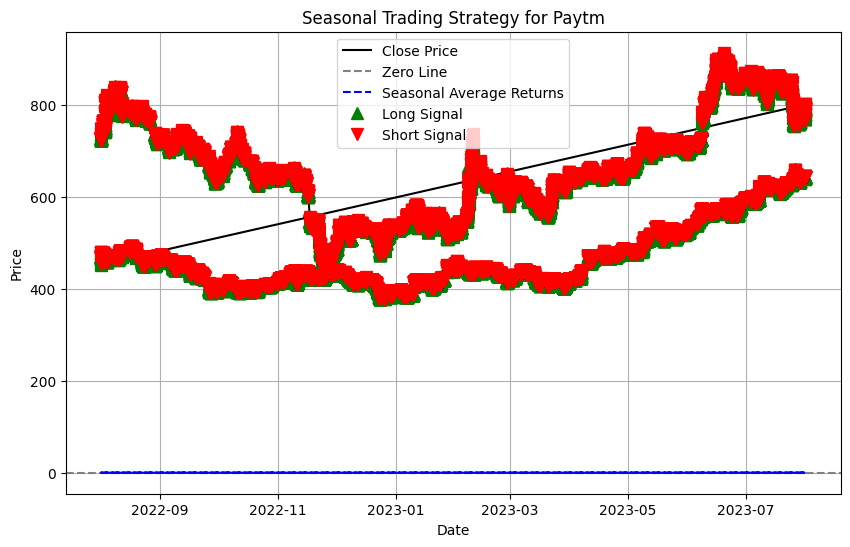

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'])

# Define parameters for the seasonal trading strategy
seasonal_period = 20  # Number of trading days in a seasonal period

# Calculate average returns for each seasonal period
data['Returns'] = data['Close'].pct_change()
data['SeasonalAverage'] = data['Returns'].rolling(window=seasonal_period).mean()

# Identify seasonal trading opportunities
data['LongSignal'] = data['Returns'] > data['SeasonalAverage']
data['ShortSignal'] = data['Returns'] < data['SeasonalAverage']

# Plotting the data with seasonal trading signals
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='black')
plt.axhline(y=0, color='gray', linestyle='--', label='Zero Line')

# Plot seasonal average returns
plt.plot(data['Date'], data['SeasonalAverage'], label='Seasonal Average Returns', color='blue', linestyle='--')

# Plot seasonal trading signals
plt.plot(data[data['LongSignal']]['Date'], data[data['LongSignal']]['Close'], '^', markersize=8, color='green', label='Long Signal')
plt.plot(data[data['ShortSignal']]['Date'], data[data['ShortSignal']]['Close'], 'v', markersize=8, color='red', label='Short Signal')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Seasonal Trading Strategy for Paytm')
plt.legend()
plt.grid()
plt.show()


# ***10***-***Volatility*** ***Breakout*** **Strategy**

In [48]:
# The Volatility Breakout Strategy is designed to take advantage of periods of
# increased market volatility by trading breakouts above or below certain price
# levels. Volatility refers to the magnitude of price fluctuations in a financial
# instrument, and when volatility increases, markets can experience significant
# price movements. This strategy aims to capture these potentially strong price
# movements that occur after periods of low volatility.

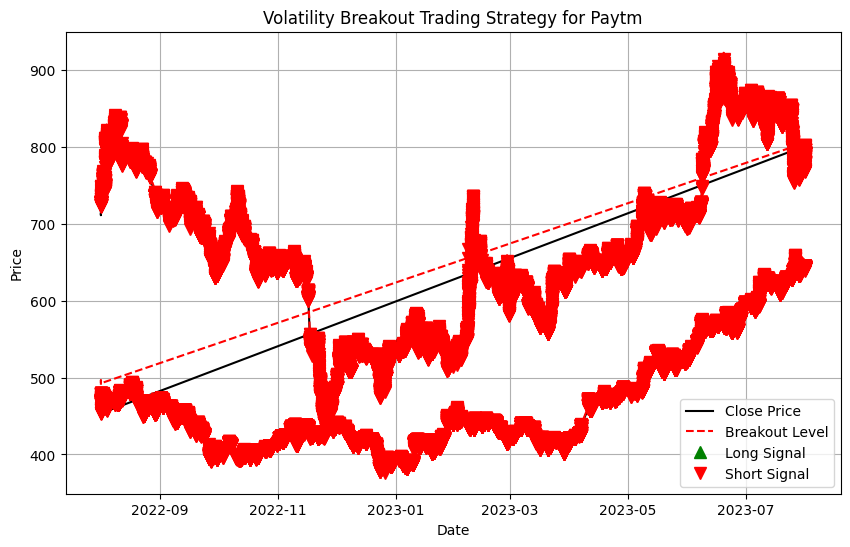

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'])

# Define parameters for the volatility breakout strategy
lookback_period = 20   # Number of periods to calculate volatility
multiplier = 2.0       # Multiplier to determine breakout levels

# Calculate the average true range (ATR) as a measure of volatility
data['HighLowRange'] = data['High'] - data['Low']
data['HighCloseRange'] = abs(data['High'] - data['Close'].shift(1))
data['LowCloseRange'] = abs(data['Low'] - data['Close'].shift(1))
data['TrueRange'] = data[['HighLowRange', 'HighCloseRange', 'LowCloseRange']].max(axis=1)
data['ATR'] = data['TrueRange'].rolling(window=lookback_period).mean()

# Calculate volatility breakout levels
data['BreakoutLevel'] = data['Close'] + multiplier * data['ATR']

# Identify volatility breakout trading opportunities
data['LongSignal'] = data['Close'] > data['BreakoutLevel']
data['ShortSignal'] = data['Close'] < data['BreakoutLevel']

# Plotting the data with volatility breakout signals
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='black')
plt.plot(data['Date'], data['BreakoutLevel'], label='Breakout Level', color='red', linestyle='--')

# Plot volatility breakout signals
plt.plot(data[data['LongSignal']]['Date'], data[data['LongSignal']]['Close'], '^', markersize=8, color='green', label='Long Signal')
plt.plot(data[data['ShortSignal']]['Date'], data[data['ShortSignal']]['Close'], 'v', markersize=8, color='red', label='Short Signal')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Volatility Breakout Trading Strategy for Paytm')
plt.legend()
plt.grid()
plt.show()
